# Montecarlo Simulation

**This is not financial advice and should not be used in investment decisions**

### Import Packages

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import pandas as pd

### Perform the Montecarlo Simulation

In [43]:
# User enters the ticker symbol
ticker = input("Please enter the ticker symbol: ")

# Get the historical data for the past 5 years
data = yf.download(ticker, period='5y')

# We will use Adjusted Close prices for the simulation
log_returns = np.log(1 + data['Adj Close'].pct_change())

# Estimate the historical log returns and volatility
u = log_returns.mean() # Mean of the log-returns
var = log_returns.var() # Variance of the log-returns
drift = u - (0.5 * var) # Drift term
stdev = log_returns.std() # Standard deviation of the log return

days = 252 # Number of trading days in a year
trials = 10000 # Number of trials in the Monte Carlo simulation

# Create a random number generator for the Monte Carlo simulation
Z = np.random.standard_normal((days, trials))

# Calculate daily returns
daily_returns = np.exp(drift + stdev * Z)

# The price of the stock today
S0 = data['Adj Close'].iloc[-1]

# Create an empty matrix to hold the price paths
price_paths = np.zeros_like(daily_returns)
price_paths[0] = S0

# Simulate the price paths
for i in range(1, days):
    price_paths[i] = price_paths[i - 1] * daily_returns[i]

# Convert price_paths numpy array to pandas DataFrame
price_paths_df = pd.DataFrame(price_paths)



[*********************100%***********************]  1 of 1 completed


## Visualizations

For 10,000 sims with 5 Yrs of Historical Data with 252 Trading Days/Year

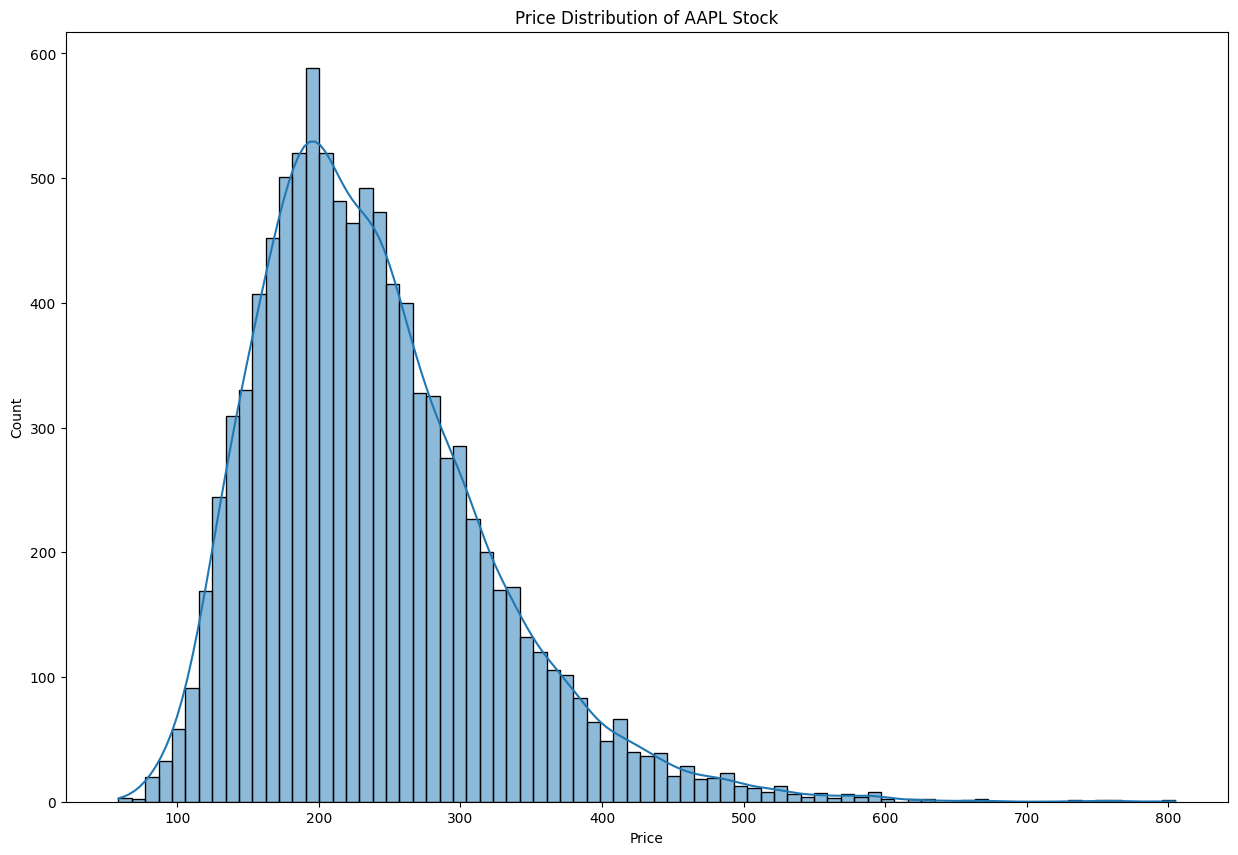

In [44]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Compute the mean of each row (each trading day) and add it to the plot
# Specify stat='count' to display count on y-axis
sns.histplot(price_paths_df.iloc[-1], kde=True, stat='count')

# Set the x-axis label to 'Price'
plt.xlabel('Price')

# Set the y-axis label to 'Count'
plt.ylabel('Count')

# Set the title of the plot to 'Price Distribution'
plt.title('Price Distribution of ' + ticker + ' Stock')

# Show the plot
plt.show()


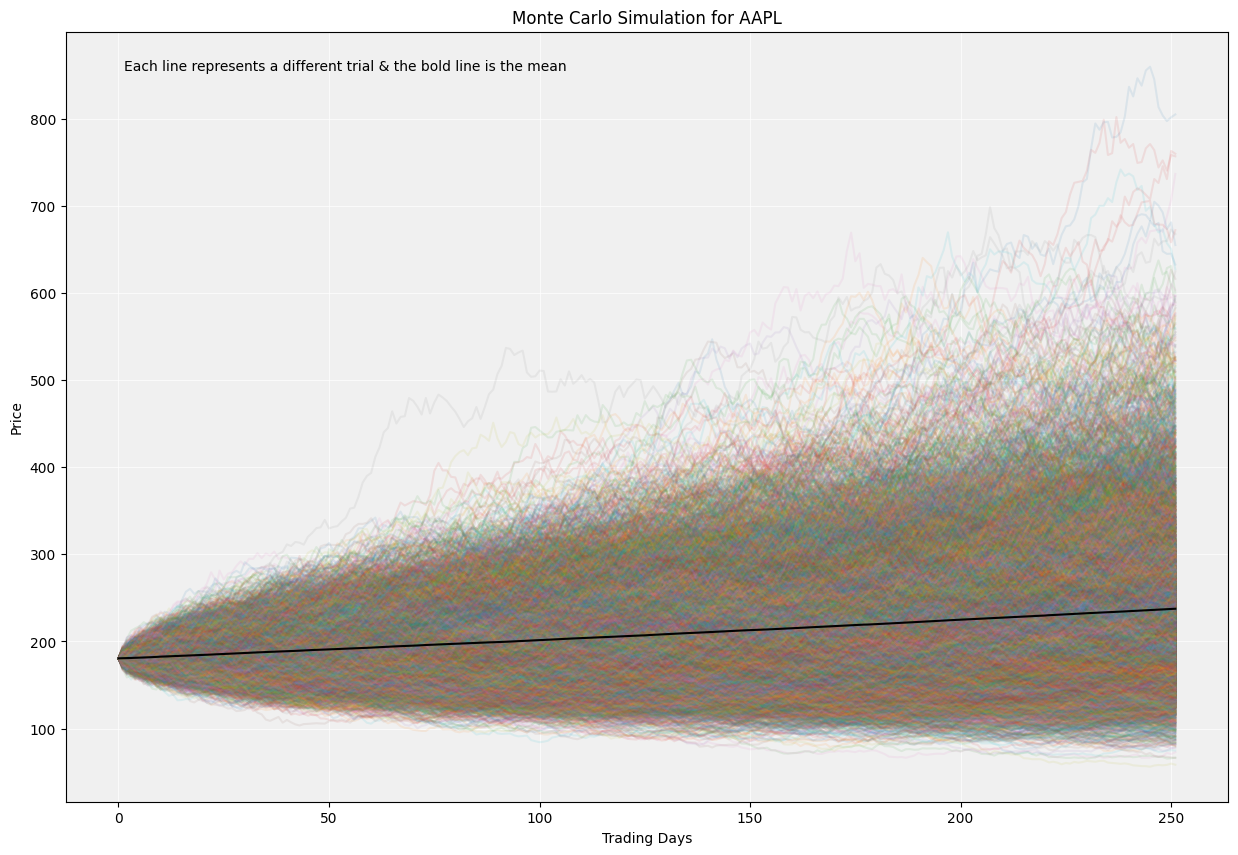

In [45]:
plt.figure(figsize=(15, 10))
plt.plot(price_paths, alpha = .1)
plt.plot(price_paths.mean(axis=1), color='black', alpha=0.99, label='Mean') # Add a line for the mean with an alpha of 0.99
plt.title('Monte Carlo Simulation for ' + ticker)
plt.xlabel('Trading Days')
plt.ylabel('Price')
plt.annotate('Each line represents a different trial & the bold line is the mean', xy=(0.05, 0.95), xycoords='axes fraction')
plt.gca().set_facecolor('#f0f0f0') # Set the background color to light grey
plt.grid(color='white', linestyle='-', linewidth=0.5) # Add gridlines
plt.show()